# Basic MLMC runs and plots

In [1]:
import numpy as np 


def non_hom_test(x, y):
    return np.sin(x)*np.sin(y)


def test_phi(x, y):
    return np.sin(np.pi*x)*np.sin(np.pi*y)


def test_bound(x, y):
    return 0


def test_rhs(x, y):
    return np.pi**2 * (np.sin(np.pi * x)*np.sin(np.pi * y))


In [2]:
from mlmc import mlmc
from tqdm.notebook import tqdm


def check_mlmc(N, epsilon, dt0, x=.5, y=.5):
    errs = np.zeros(N)
    expectation = np.zeros(N)
    cost = np.zeros(N)
    max_level = np.zeros(N)
    for i in tqdm(range(N)):
        expectation[i], cost[i], max_level[i] = mlmc(x, y, 
                                                     test_bound, test_rhs, 
                                                     dt0, epsilon)
        errs[i] =  abs(test_phi(x, y) - expectation[i])
        
    return errs, cost, max_level

  0%|          | 0/1 [00:00<?, ?it/s]

average error:  0.06910625205393184
maximal error:  0.06910625205393184
minimal error:  0.06910625205393184
std of error:  0.0


  0%|          | 0/1 [00:00<?, ?it/s]

average error:  0.09770656751226259
maximal error:  0.09770656751226259
minimal error:  0.09770656751226259
std of error:  0.0


  0%|          | 0/1 [00:00<?, ?it/s]

average error:  0.00548493285760876
maximal error:  0.00548493285760876
minimal error:  0.00548493285760876
std of error:  0.0


  0%|          | 0/1 [00:00<?, ?it/s]

average error:  0.02156738835036731
maximal error:  0.02156738835036731
minimal error:  0.02156738835036731
std of error:  0.0


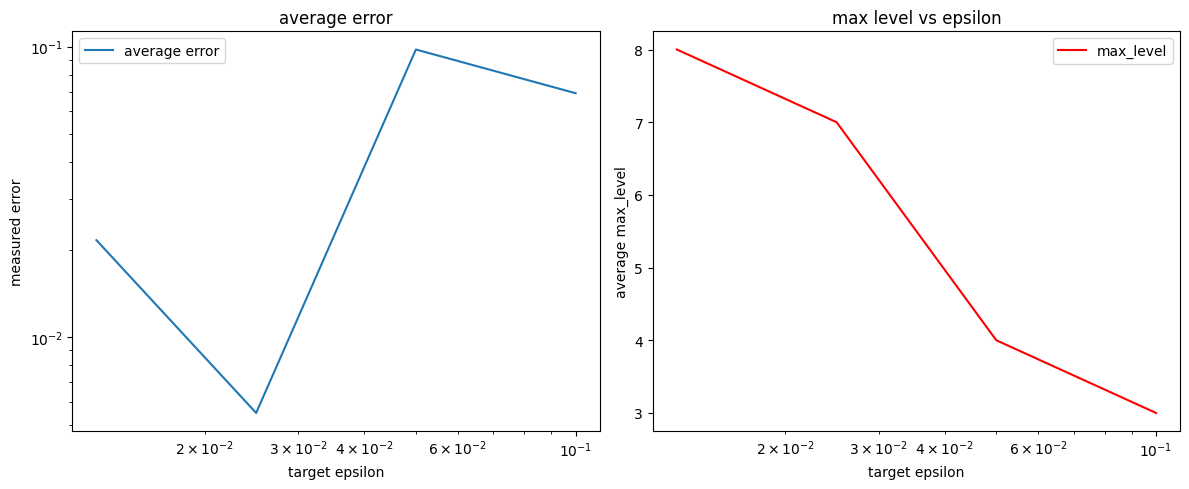

In [3]:
import matplotlib.pyplot as plt
N = 1
x = y = .5
dt0 = .01
epsilons = [.1, .05, .025, .0125]
mean_errs = []
mean_levels = []
mean_costs = []

for eps in epsilons:
    errs, costs, levels = check_mlmc(N, eps, dt0)
    print("average error: ", errs.mean())
    print("maximal error: ", errs.max())
    print("minimal error: ", errs.min())    
    print("std of error: ", errs.std())
    mean_errs.append(errs.mean())
    mean_levels.append(levels.mean())

# Create subplots with 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Log-Log plot
axes[0].loglog(epsilons, mean_errs, label="average error")
axes[0].set_title("average error")
axes[0].set_xlabel("target epsilon")
axes[0].set_ylabel("measured error")
axes[0].legend()

# Linear plot
axes[1].plot(epsilons, mean_levels, label="max_level", color="r")
axes[1].set_title("max level vs epsilon")
axes[1].set_xlabel("target epsilon")
axes[1].set_ylabel("average max_level")
axes[1].set_xscale("log")
axes[1].legend()

# Show plots
plt.tight_layout()  # Adjust spacing
plt.show()

In [5]:
# benchmark how long it takes to generate a single sample
from random_walk import feynman_kac_correlated
x = .5
y = .5
dt_fine = .0001
level = 1

%timeit feynman_kac_correlated((x, y, test_bound, test_rhs, dt_fine, level))

8.15 ms ± 396 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


  0%|          | 0/50 [00:00<?, ?it/s]

average error:  0.03597649442939815
maximal error:  0.08432758785169248
minimal error:  0.0005590837187177122
std of error:  0.019531746717260483


  0%|          | 0/50 [00:00<?, ?it/s]

average error:  0.039515914326999996
maximal error:  0.07972484908078559
minimal error:  0.0030675349468860524
std of error:  0.023124304849946736


  0%|          | 0/50 [00:00<?, ?it/s]

average error:  0.039466423346742247
maximal error:  0.08580029416176771
minimal error:  0.0005455217390584188
std of error:  0.019868840486401383


  0%|          | 0/50 [00:00<?, ?it/s]

average error:  0.02447466532502953
maximal error:  0.0489124845714386
minimal error:  0.0009728293735298266
std of error:  0.013751156786233579


  0%|          | 0/50 [00:00<?, ?it/s]

average error:  0.019671105360510307
maximal error:  0.04795291203769758
minimal error:  0.0013328605428367668
std of error:  0.013324431195575828


  0%|          | 0/50 [00:00<?, ?it/s]

average error:  0.01681562003073034
maximal error:  0.039159865593854315
minimal error:  5.950734560555837e-05
std of error:  0.011262959505047186


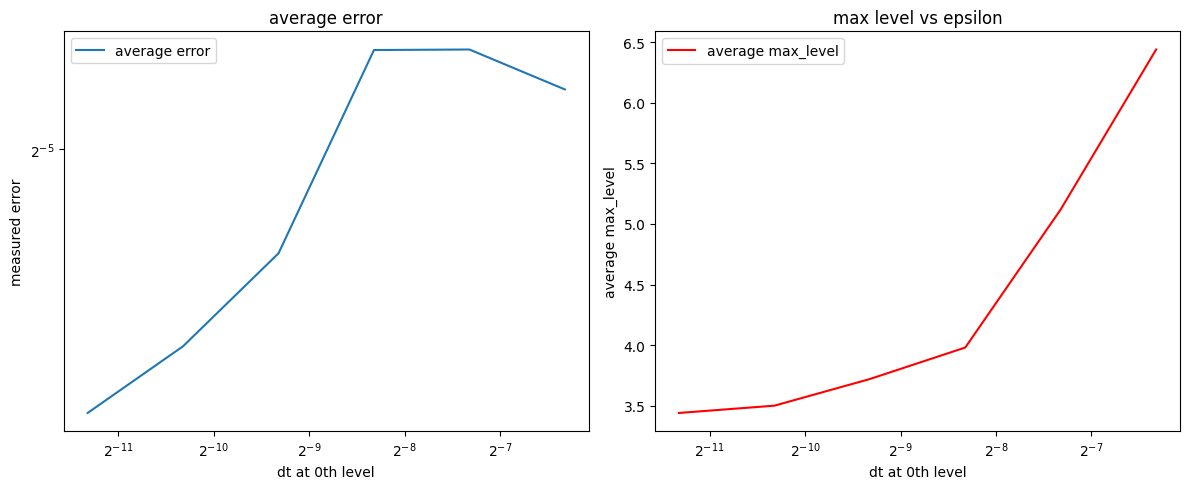

In [12]:
import matplotlib.pyplot as plt
N = 50
x = y = .5
dt0s = [.1/(2**i) for i in range(3, 9)]
epsilon = .025
mean_errs = []
mean_levels = []
mean_costs = []

for dt0 in dt0s:
    errs, costs, levels = check_mlmc(N, epsilon, dt0)
    print("average error: ", errs.mean())
    print("maximal error: ", errs.max())
    print("minimal error: ", errs.min())    
    print("std of error: ", errs.std())
    mean_errs.append(errs.mean())
    mean_levels.append(levels.mean())

# Create subplots with 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Log-Log plot
axes[0].loglog(dt0s, mean_errs, label="average error", base=2)
axes[0].set_title("average error")
axes[0].set_xlabel("dt at 0th level")
axes[0].set_ylabel("measured error")
axes[0].legend()

# Linear plot
axes[1].plot(dt0s, mean_levels, label="average max_level", color="r")
axes[1].set_title("max level vs epsilon")
axes[1].set_xlabel("dt at 0th level")
axes[1].set_ylabel("average max_level")
axes[1].set_xscale("log", base=2)

axes[1].legend()

# Show plots
plt.tight_layout()  # Adjust spacing
plt.show()